In [1]:
# import pandas as pd

# df = pd.read_html("elevacao_guaiba.xls")


# df = df[0].iloc[6:][[0, 1, 2, 3, 4]]
# df.columns = [
#     "datetime",
#     "hourly_rain_mm",
#     "water_level_cm",
#     "flow_rate_m3_per_s",
#     "batery_v",
# ]

# df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S")

# updates = {
#     "2024-05-11 10:45:00": 459.00,
#     "2024-05-11 10:30:00": 459.00,
#     "2024-05-11 10:15:00": 459.00,
#     "2024-05-11 10:00:00": 459.00,
#     "2024-05-11 09:45:00": 459.00,
#     "2024-05-11 09:30:00": 459.00,
#     "2024-05-11 09:15:00": 459.00,
#     "2024-05-11 09:00:00": 459.00,
#     "2024-05-11 08:45:00": 460.00,
#     "2024-05-11 08:30:00": 460.00,
# }

# for date_str, level in updates.items():
#     date = pd.to_datetime(date_str)
#     df.loc[df["datetime"] == date, "water_level_cm"] = level


# df.to_csv("elevacao_guaiba.csv", index=False)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Plots

In [5]:
df = pd.read_csv("/home/bruno/mestrado/Time-LLM/neuralforecast_timellm/guiaba/elevacao_guaiba.csv")

In [7]:
df["ds"] = pd.to_datetime(df["datetime"])
df = df.drop("datetime", axis=1)
df = df.sort_values(by="ds", ascending=True).reset_index(drop=True)
df = df.rename(columns={"water_level_cm": "y"})

In [8]:
from neuralforecast.utils import augment_calendar_df

/home/bruno/mestrado/Time-LLM/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df, _ = augment_calendar_df(df=df, freq="T")

In [10]:
df

,hourly_rain_mm,y,flow_rate_m3_per_s,batery_v,ds,hourminute,dayhour,weekday,monthday,yearday
0,NaN,522.0,NaN,12.1,2024-05-04 18:30:00,0.008475,0.282609,0.333333,-0.400000,-0.160274
1,NaN,518.0,NaN,12.1,2024-05-04 18:45:00,0.262712,0.282609,0.333333,-0.400000,-0.160274
2,NaN,521.0,NaN,12.1,2024-05-04 19:00:00,-0.500000,0.326087,0.333333,-0.400000,-0.160274
3,NaN,521.0,NaN,12.1,2024-05-04 19:15:00,-0.245763,0.326087,0.333333,-0.400000,-0.160274
4,NaN,522.0,NaN,12.1,2024-05-04 19:30:00,0.008475,0.326087,0.333333,-0.400000,-0.160274
...,...,...,...,...,...,...,...,...,...,...
1059,0.0,511.0,NaN,13.1,2024-05-15 19:15:00,-0.245763,0.326087,-0.166667,-0.033333,-0.130137
1060,0.0,512.0,NaN,13.1,2024-05-15 19:30:00,0.008475,0.326087,-0.166667,-0.033333,-0.130137
1061,0.0,512.0,NaN,13.1,2024-05-15 19:45:00,0.262712,0.326087,-0.166667,-0.033333,-0.130137
1062,0.0,510.0,NaN,13.1,2024-05-15 20:00:00,-0.500000,0.369565,-0.166667,-0.033333,-0.130137


In [3]:
Y_train_df = pd.read_csv("gpt2_onevariable/y_train.csv")
Y_test_df = pd.read_csv("gpt2_onevariable/y_test.csv")
# Y_train_df_bert = pd.read_csv("bert/y_train.csv")
# Y_test_df_bert = pd.read_csv("bert/y_test.csv")

In [4]:
Y_train_df

,ds,y,unique_id
0,2024-05-04 18:30:00,522.0,guaiba
1,2024-05-04 18:45:00,518.0,guaiba
2,2024-05-04 19:00:00,521.0,guaiba
3,2024-05-04 19:15:00,521.0,guaiba
4,2024-05-04 19:30:00,522.0,guaiba
...,...,...,...
963,2024-05-14 19:15:00,525.0,guaiba
964,2024-05-14 19:30:00,522.0,guaiba
965,2024-05-14 19:45:00,523.0,guaiba
966,2024-05-14 20:00:00,524.0,guaiba


In [3]:
Y_train_df["ds"] = pd.to_datetime(Y_train_df["ds"])
Y_test_df["ds"] = pd.to_datetime(Y_test_df["ds"])

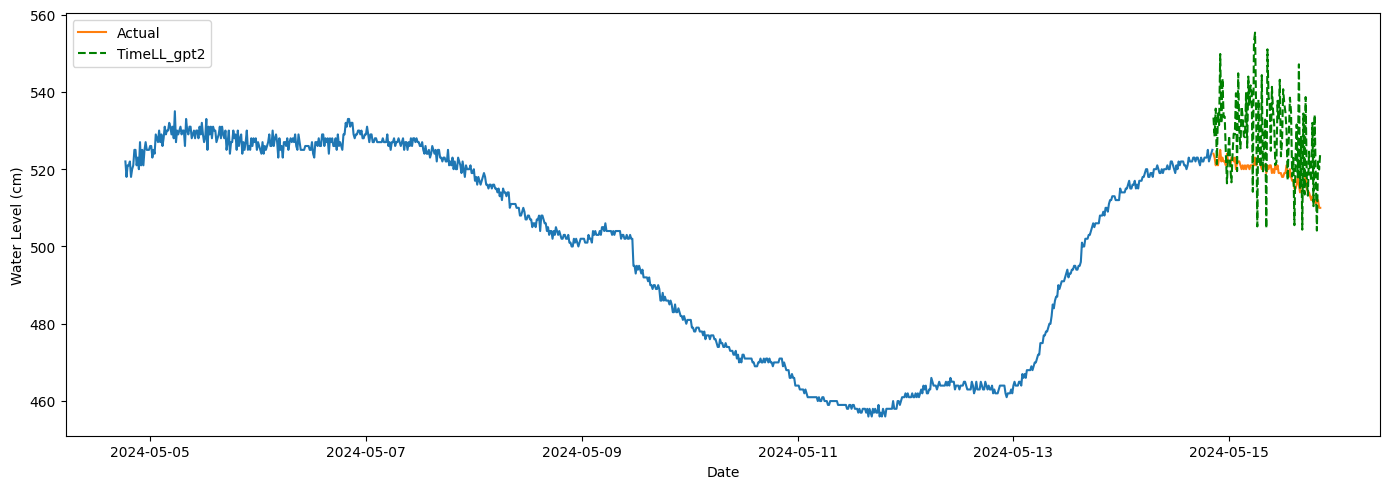

In [4]:
plt.figure(figsize=(14, 5))

plt.plot(Y_train_df['ds'], Y_train_df['y'])
plt.plot(Y_test_df['ds'], Y_test_df['y'], label='Actual')
plt.plot(Y_test_df['ds'], Y_test_df['TimeLL_gpt2'], label='TimeLL_gpt2', ls='--', color='green')


plt.xlabel("Date")
plt.ylabel("Water Level (cm)")

plt.legend(loc='best')

plt.tight_layout()

## Error

In [5]:
y_true = Y_test_df['y']

# gpt metrics
y_pred_gpt = Y_test_df['TimeLL_gpt2']
mae_gpt = mean_absolute_error(y_true, y_pred_gpt)
rmse_gpt = np.sqrt(mean_squared_error(y_true, y_pred_gpt))
mse_gpt = mean_squared_error(y_true, y_pred_gpt)

print(f"Mean Absolute Error (MAE) - GPT2: {mae_gpt}")
print(f"Root Mean Squared Error (RMSE) - GP2: {rmse_gpt}")
print(f"Mean Squared Error (MSE) - GP2: {mse_gpt}")

Mean Absolute Error (MAE) - GPT2: 11.583048645833324
Root Mean Squared Error (RMSE) - GP2: 14.086817744144584
Mean Squared Error (MSE) - GP2: 198.4384341567467
